<center>
<h2>Capstone Project</h2>

# <span style='color: #81A5FF; '> 😋 Exploratory Client Data Analysis and Normalization </span>

<h3> Group 4 </h3>

<span style='color: #81A5FF; font-size: 18px;'>2023/2024</span>
</center>



---------

The present notebook refers to the section of exploring the simulated client-centred data and prepare it according to certain assumptions to be further used within the Flavour Flix platform. Essentially, the key procedures followed throughout this section are:

### Table of Contents <a class="anchor" id='toc'></a>

<span style = 'font-size: 18px;'>

1. [🍽️ Importing Libraries and Data](#data-import)  ;  <br>
2. [🍽️ Summary Statistics](#statistics);<br>
3. [🍽️ Visualization and Consistency Checking](#visualization)  ; <br>
4. [🍽️ Exporting the Data](#export);<br>

</span>


-------

### 1. 🍽️ Importing Libraries and Data <a class="anchor" id="data-import"></a>
[Back to TOC](#toc)

In [46]:
# importing the necessary libraries and modules
import numpy as np
import pandas as pd
from datetime import datetime
import random

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from functions.utils import *
from functions.location import *
from functions.preprocessement import *

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# importing the data
client_data = pd.read_csv('data/clientData.csv', sep=',')

### 2. 🍽️ Summary Statistics <a class="anchor" id="statistics"></a>
[Back to TOC](#toc)

In [48]:
client_data.describe()

,id,price_range
count,1000.000000,900.000000
mean,500.500000,17.854444
std,288.819436,4.595535
min,1.000000,10.000000
25%,250.750000,14.000000
50%,500.500000,18.000000
75%,750.250000,22.000000
max,1000.000000,25.000000


In [49]:
client_data.describe(include='object')

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,smoker,drinks_alcohol,dietary_restrictions,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour
count,1000,1000,1000,923,1000,1000,938,943,946,938,1000,1000,982,979,1000,968,1000,891,1000,1000
unique,224,994,1000,2,1000,964,14,19,2,2,3,11,56,29,5,9,25,21,4,4
top,Åsa,Paddemore,wdouberday0@google.com.br,Male,mdouberday0,28/01/1960,Portuguese,Lisbon,False,True,none,none,lasanha,lasanha,mindful,Credit Card,after work,portuguese,13:00 - 14:00,20:00 - 21:00
freq,11,2,1,467,1,3,836,88,498,482,634,899,40,63,217,439,431,330,505,505


In [50]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   first_name            1000 non-null   object 
 2   last_name             1000 non-null   object 
 3   email                 1000 non-null   object 
 4   gender                923 non-null    object 
 5   username              1000 non-null   object 
 6   date_of_birth         1000 non-null   object 
 7   nationality           938 non-null    object 
 8   city                  943 non-null    object 
 9   travel_car            1000 non-null   bool   
 10  smoker                946 non-null    object 
 11  drinks_alcohol        938 non-null    object 
 12  dietary_restrictions  1000 non-null   object 
 13  allergies             1000 non-null   object 
 14  favourite_food        982 non-null    object 
 15  dislike_food          

### 3. 🍽️ Visualization and Consistency-checking <a class="anchor" id="visualization"></a>
[Back to TOC](#toc)

#### Preferred Average Price per Person

In [51]:
# finding rows in 'client_data' where 'price_range' is null.
client_data[client_data['price_range'].isnull()]

,id,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,...,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,price_range,cuisine_type,lunch_hour,dinner_hour
3,4,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,21/10/1974,Portuguese,Coimbra,False,...,none,filetes de pescada,ceviche,foodie,MBWay,after work,NaN,portuguese,13:00 - 14:00,20:00 - 21:00
7,8,Nuó,Jordison,bjordison7@soup.io,Male,ljordison7,27/07/2001,Mozambican,Coimbra,True,...,none,pasteis de bacalhau,pão de queijo,adventurous,Cash,after work,NaN,portuguese,13:00 - 14:00,20:00 - 21:00
12,13,Stéphanie,Sargent,jsargentc@nymag.com,Female,csargentc,01/01/1987,Italian,Santarém,False,...,none,pizza,ceviche,mindful,NaN,after work,NaN,portuguese,13:00 - 14:00,18 :00 - 19:00
47,48,Lorène,Edwin,eedwin1b@mtv.com,Male,ledwin1b,04/07/1994,Portuguese,Coimbra,True,...,castanhas,panados,bacalhau,adventurous,MBWay,after work,NaN,italian,13:00 - 14:00,20:00 - 21:00
58,59,Kuí,Dybald,mdybald1m@redcross.org,Female,fdybald1m,22/05/2001,Portuguese,Setúbal,False,...,none,panados,sopa de tomate,adventurous,MBWay,bistro,NaN,portuguese,11:00 - 12:00,20:00 - 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,André,Habbal,lhabbalq9@aol.com,Female,khabbalq9,20/07/1988,Portuguese,Guimarães,True,...,none,dim sum,filetes de pescada,foodie,Cash,contemporary,NaN,indian,12 :00 - 13:00,20:00 - 21:00
965,966,Hélèna,Venus,bvenusqt@histats.com,Male,cvenusqt,28/05/1973,Portuguese,Porto,False,...,none,frango com piri-piri,ceviche,foodie,Credit Card,central,NaN,international,12 :00 - 13:00,20:00 - 21:00
966,967,Nadège,Lockley,vlockleyqu@freewebs.com,Male,ulockleyqu,06/11/1970,Portuguese,NaN,False,...,none,bacalhau a bras,churrasco,comfort,MBWay,author,NaN,mediterranean,13:00 - 14:00,20:00 - 21:00
983,984,Aí,Jewkes,jjewkesrb@digg.com,Female,cjewkesrb,12/01/1956,Portuguese,Portalegre,True,...,none,ceviche,lasanha,comfort,Credit Card,cosy,NaN,japanese,12 :00 - 13:00,20:00 - 21:00


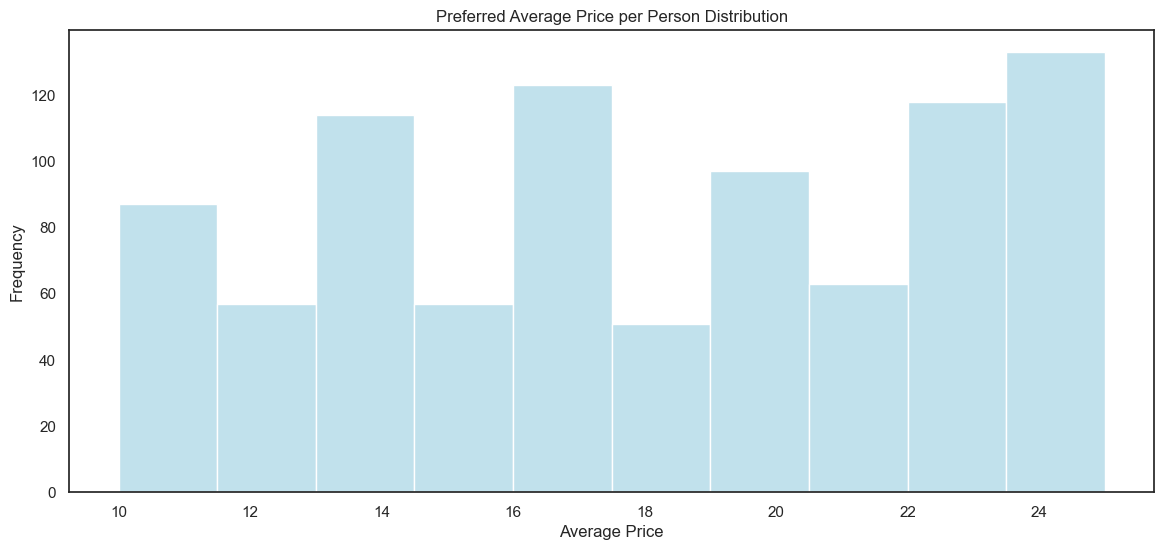

In [52]:
# Create the histogram using Seaborn without the grid
sns.set(style="white") 
plt.figure(figsize=(14, 6))
sns.histplot(client_data['price_range'], bins=10, color='lightblue')

# labelling the axis
plt.xlabel('Average Price')
plt.ylabel('Frequency')

plt.title('Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

> We assumed that the distribution of this type of feature would resemble more a normal distribution rather than a multi-modal distribution. For this reason, we opted to reduce the amount of observations within the extremes and put them near the average.

In [53]:
# Normalizing the distributed prices such that they are more realistic
def normally_distributed_prices(price):
    if random.random() < 0.5:
        price = random.randint(12, 21)
    else:
        if random.random() > 0.9:
            price = random.randint(21, 40)
    return price

In [54]:
# Normalizing the distributed prices
client_data['normal_price_range'] = client_data['price_range'].apply(normally_distributed_prices)

In [55]:
# Replacing missing values 
client_data['normal_price_range'].fillna(random.randint(12, 31), inplace=True)

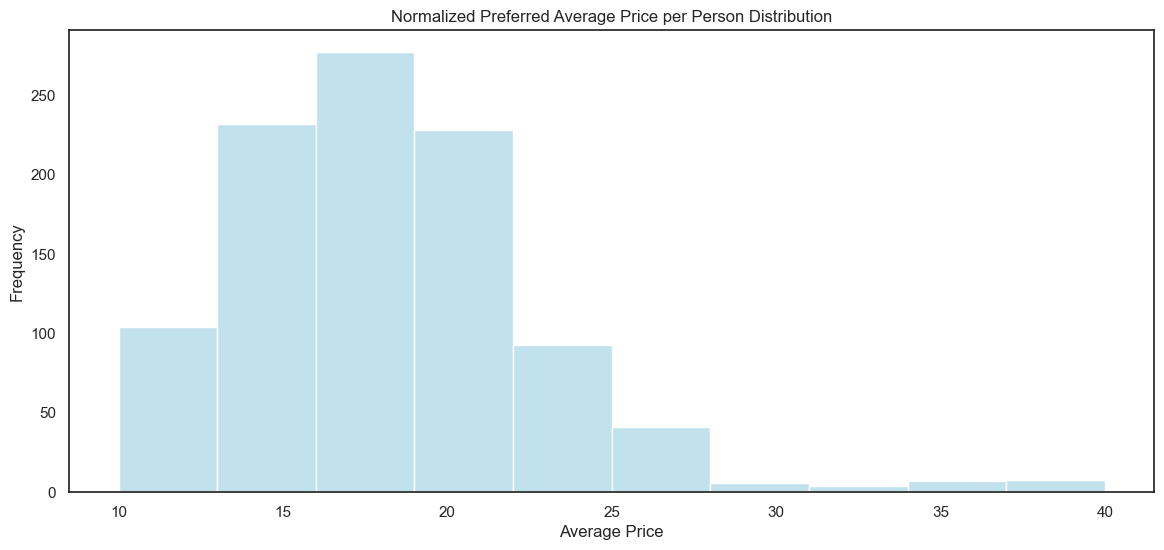

In [56]:
# Create the histogram using Seaborn for the normalized data
sns.set(style="white")  
plt.figure(figsize=(14, 6))
sns.histplot(client_data['normal_price_range'], bins=10, color='lightblue')

# labelling the axis
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Normalized Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

#### Date of Birth and Age

In [57]:
# Converting 'DOB' column to datetime
client_data['date_of_birth'] = pd.to_datetime(client_data['date_of_birth'], format='%d/%m/%Y')

# Calculating the age
current_date = datetime.datetime.now()
client_data['age'] = (current_date - client_data['date_of_birth']) // pd.Timedelta(days=365.25)  # Accounting for leap years

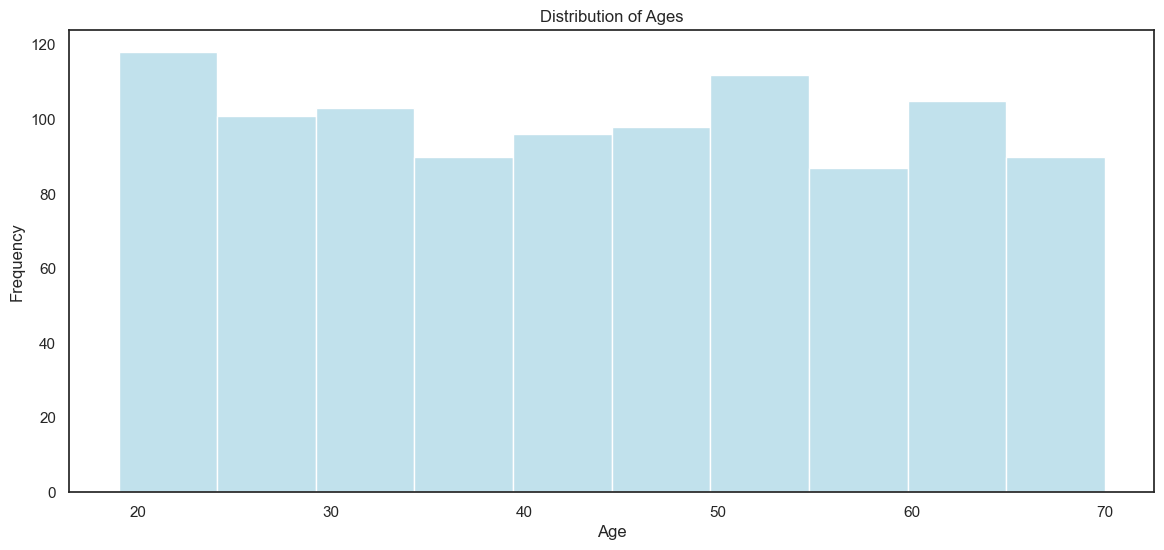

In [58]:
# Create the histogram for the age distribution
sns.set(style="white")  # Keeping the style without grid
plt.figure(figsize=(14, 6))
sns.histplot(client_data['age'], bins=10, color='lightblue')

# Labelling the axis
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

#### Gender

In [59]:
# Replacing missing values with 'Other'
client_data['gender'].fillna('Other', inplace=True)

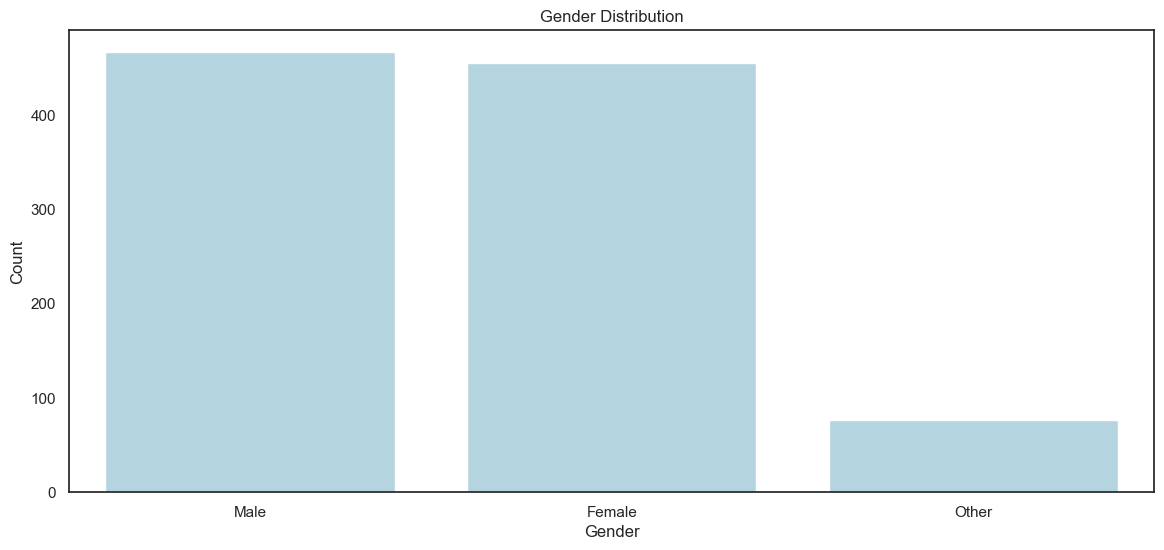

In [60]:
# Create the count plot for gender distribution
sns.set(style="white")  # Style without grid
plt.figure(figsize=(14, 6))
sns.countplot(data=client_data, x='gender', palette=['lightblue'])
plt.title('Gender Distribution')

# Labelling the axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Smokers and Alcohol

In [61]:
# Replacing the null values with 'False
client_data['smoker'].fillna(False, inplace=True)

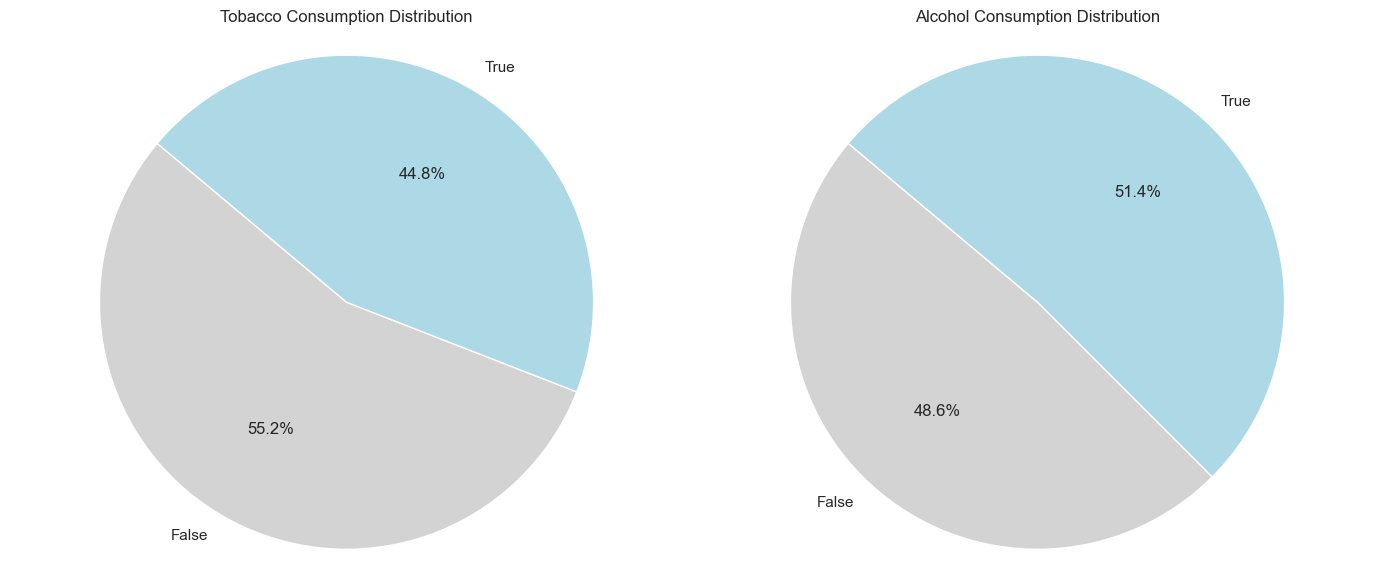

In [62]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)
colors = ['lightgray', 'lightblue']
# Creating subplots for the distributions
plt.figure(figsize=(14, 6))

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

The data from the Portuguese National Health Survey from 2019 finds that only 17% of the portuguese population is a smoker - thus, we will try to reshape our distribution to match these statistics more accordingly. Also in the afore mentioned report, it is stated that approximately 70% of Portugal's residents have consumed at least one alcoholic beverage within a year time span. For this reason, it seems that the current distribution of people who drink alcohol seems sensible. The missing values of the latter were inputed with "True".

In [63]:
# Normalizing the data such that it is more realistic
def adjust_smoking(observation, percentage):
    if observation == True and random.random() < percentage:
        return False
    else:
        return observation

In [64]:
# Normalizing the data
client_data['smoker_n'] = client_data['smoker'].apply(lambda x: adjust_smoking(x, 0.65))

In [65]:
# Replacing the missing values with 'True'
client_data['drinks_alcohol'].fillna(True, inplace=True)

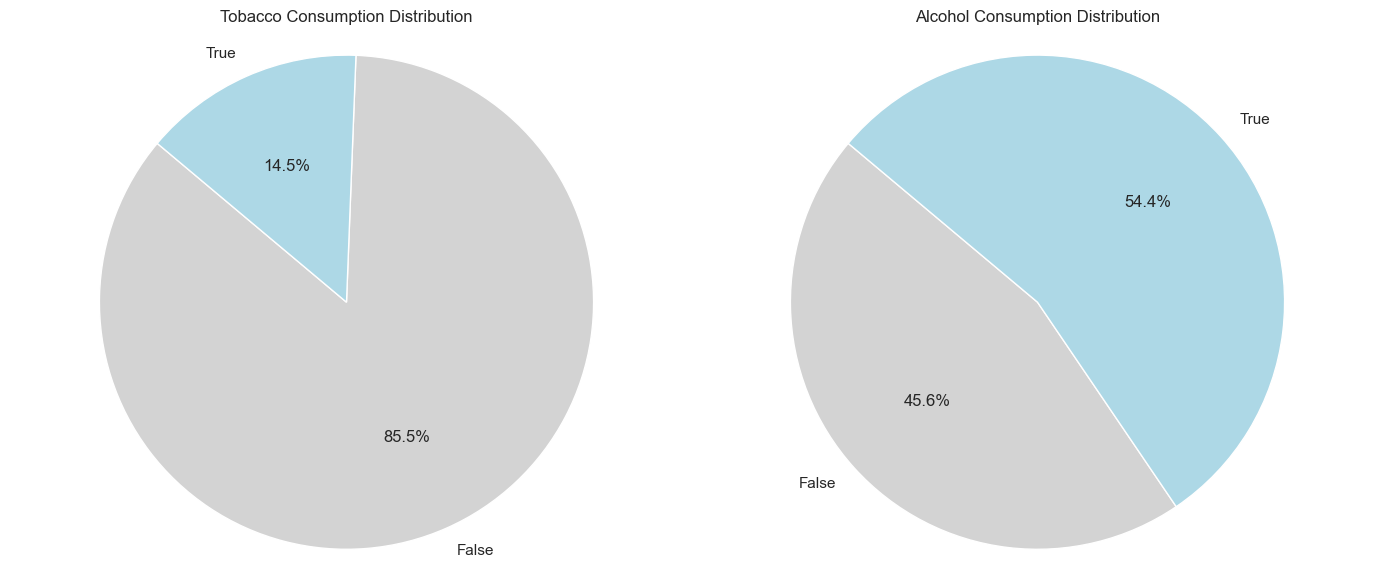

In [66]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker_n'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)

# Creating subplots for the distributions
plt.figure(figsize=(14, 6))

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Other remaining missing values

In [67]:
# Replacing the remaining missing values 
def fill_randomly(observation, options):
    if pd.isna(observation):  # Check for NaN (missing) values
        return random.choice(options)
    else:
        return observation

In [68]:
# Replacing the missing values for the column 'city'
unique_cities_without_nan = [city for city in list(client_data['city'].unique()) if not pd.isna(city)]
client_data['city'] = client_data['city'].apply(lambda x: fill_randomly(x, unique_cities_without_nan))

In [69]:
# Replacing the missing values for the column 'nationality'
client_data['nationality'] = client_data['nationality'].apply(lambda x: fill_randomly(x, ['Portuguese', 'Brazillian', 'American', 'British']))

In [70]:
# Replacing the missing values for the column 'preferred_payment'
client_data['preferred_payment'] = client_data['preferred_payment'].apply(lambda x: fill_randomly(x, ['MBWay', 'Cash', 'Credit Card', 'Visa', 'Paypal']))

In [71]:
# Dropping the columns 'age', 'smoker', and 'price_range'
client_data.drop(columns=['age', 'smoker', 'price_range'], axis=1, inplace=True)

### 4. 🍽️ Exporting the Data <a class="anchor" id="export"></a>
[Back to TOC](#toc)

In [73]:
client_data.set_index('id', inplace=True)

In [ ]:
# Exporting the preprocessed data to a csv file
client_data.to_csv('data/clientData.csv', index=False)